<a href="https://colab.research.google.com/github/RoseSarlake/spectral-image/blob/main/task4_2.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Connect to goggle drive
from google.colab import drive
drive.mount("/content/drive")

# Import needed libraries 
import matplotlib.pyplot as plt
import numpy

Mounted at /content/drive


This code below is not needed

sample_640.tif
/content/drive/MyDrive/ASI/ASI course 2021/Measurement session (for all)/Nuance/data_1/sample/sample_640.tif
(1040, 1392)
2057


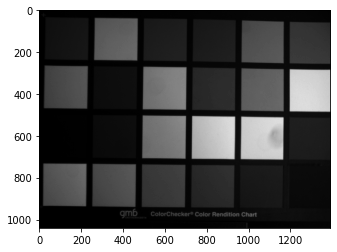

In [2]:
# Not needed code
from PIL import Image
import os
# prepare file path to read
dirpath = "/content/drive/MyDrive/ASI/ASI course 2021/Measurement session (for all)/Nuance/data_1/sample/"
file = "sample_"
i = 640
nu = str(i)
ext = ".tif"
filename = file+nu+ext
print(filename)
fullpath = os.path.join(dirpath, filename)
print(fullpath)

im = Image.open(fullpath) 
imarray = numpy.array(im) 
print(imarray.shape)
print(numpy.amax(imarray)) 
plt.imshow(imarray, cmap='gray') #, vmin=0, vmax=3138
im.show()

This code below does not arrange slice in alphabetical order

This code below works just fine
ENVI
description = {
File Imported into ENVI}
file type = ENVI

samples = 1392
bands = 51
lines = 1040

interleave = bil
data type = 12
header offset = 0
byte order = 0

1040 1392 51
(1040, 51, 1392)
/content/drive/MyDrive/ASI/ASI course 2021/Measurement session (for all)/Nuance/data_1/sample/sample_450.tif
/content/drive/MyDrive/ASI/ASI course 2021/Measurement session (for all)/Nuance/data_1/sample/sample_460.tif
/content/drive/MyDrive/ASI/ASI course 2021/Measurement session (for all)/Nuance/data_1/sample/sample_510.tif
/content/drive/MyDrive/ASI/ASI course 2021/Measurement session (for all)/Nuance/data_1/sample/sample_890.tif
/content/drive/MyDrive/ASI/ASI course 2021/Measurement session (for all)/Nuance/data_1/sample/sample_910.tif
/content/drive/MyDrive/ASI/ASI course 2021/Measurement session (for all)/Nuance/data_1/sample/sample_790.tif
/content/drive/MyDrive/ASI/ASI course 2021/Measurement session (for all)/Nuance/data_1/sample/sample_740.tif
/content/drive/MyDrive/ASI/ASI course 2021/Measurement session (for all)/Nuance/data_1/sample/sample_820.tif
/content/drive/MyDrive/ASI/ASI course 2021/Measurement session (for all)/Nuance/data_1/sample/samp

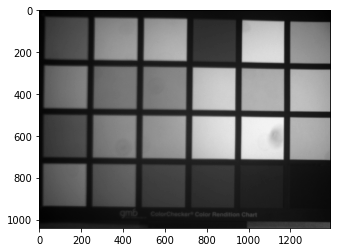

In [4]:
# Read Dir with Nuance spectral image slices
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# This will be arbitrary order of spectral slices [Color checker_400.tif, Color checker_720.tif]. Thus it can be 500, 720, 420... etc, i.e. wrong order
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
dirpath = "/content/drive/MyDrive/ASI/ASI course 2021/Measurement session (for all)/Nuance/data_1/sample/"
myDir = os.listdir(dirpath)
# Read the first image define it size, define the total number of Images and get the size of future ENVI Spectral Cube
fullpath = os.path.join(dirpath, myDir[0])
im = Image.open(fullpath) 
single_slice = numpy.array(im) # make a numpy array
[x, y] = single_slice.shape 
spectral = len(myDir)
print(x, y, spectral)

# save as integers, data type = 12
spectral_cube = numpy.ndarray(shape=(x,spectral,y), dtype=numpy.uint16)
print(spectral_cube.shape)

i=0
for file in myDir:
  fullpath = os.path.join(dirpath, file)
  print(fullpath)
  im = Image.open(fullpath) 
  single_slice = numpy.array(im)
  #print(imarray.shape)
  spectral_cube[:,i,:]=single_slice
  i = i + 1

# Save ready ENVI cube made of tiffs
saveraw = "/content/drive/MyDrive/ASI/Temp/nuance.raw"
fileobj = open(saveraw, mode='wb')
spectral_cube.tofile(fileobj)
fileobj.close()
print('Ready')
plt.imshow(spectral_cube[:,10,:], cmap='gray') #, vmin=0, vmax=3138
im.show()

In [6]:
print(spectral_cube.shape)

(1040, 51, 1392)


In [14]:
# Read Dir with Nuance spectral image slices
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# Read slices in a correct order
# Order will be Red - band 16, Green - band 10, Blue - band 7
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
dirpath = "/content/drive/MyDrive/ASI/ASI course 2021/Measurement session (for all)/Nuance/data_1/sample"
myDir = os.listdir(dirpath)
# Read the first image define it size, define the total number of Images and get the size of future ENVI Spectral Cube
fullpath = os.path.join(dirpath, myDir[0])
im = Image.open(fullpath) 
single_slice = numpy.array(im)
[x, y] = single_slice.shape 
spectral = len(myDir)
print(x, y, spectral)

# save as integers, data type = 12
spectral_cube = numpy.ndarray(shape=(x,spectral,y), dtype=numpy.uint16)
print(spectral_cube.shape)

band=0
for i in range(450,950,10):
  # prepare file path ################
  dirpath = "/content/drive/MyDrive/ASI/ASI course 2021/Measurement session (for all)/Nuance/data_1/sample"
  file = "sample_"
  nu = str(i)
  ext = ".tif"
  filename = file+nu+ext
  print(filename)
  fullpath = os.path.join(dirpath, filename)
  print(fullpath)
  print(i)  
  print(band)
  ####################################

  im = Image.open(fullpath) 
  single_slice = numpy.array(im)
  #print(imarray.shape)
  spectral_cube[:,band,:]=single_slice
  band = band + 1


saveraw = "/content/drive/MyDrive/ASI/Temp/nuance.raw"
fileobj = open(saveraw, mode='wb')
spectral_cube.tofile(fileobj)
fileobj.close()
print('Ready')

1040 1392 51
(1040, 51, 1392)
sample_450.tif
/content/drive/MyDrive/ASI/ASI course 2021/Measurement session (for all)/Nuance/data_1/sample/sample_450.tif
450
0
sample_460.tif
/content/drive/MyDrive/ASI/ASI course 2021/Measurement session (for all)/Nuance/data_1/sample/sample_460.tif
460
1
sample_470.tif
/content/drive/MyDrive/ASI/ASI course 2021/Measurement session (for all)/Nuance/data_1/sample/sample_470.tif
470
2
sample_480.tif
/content/drive/MyDrive/ASI/ASI course 2021/Measurement session (for all)/Nuance/data_1/sample/sample_480.tif
480
3
sample_490.tif
/content/drive/MyDrive/ASI/ASI course 2021/Measurement session (for all)/Nuance/data_1/sample/sample_490.tif
490
4
sample_500.tif
/content/drive/MyDrive/ASI/ASI course 2021/Measurement session (for all)/Nuance/data_1/sample/sample_500.tif
500
5
sample_510.tif
/content/drive/MyDrive/ASI/ASI course 2021/Measurement session (for all)/Nuance/data_1/sample/sample_510.tif
510
6
sample_520.tif
/content/drive/MyDrive/ASI/ASI course 2021/Me

In [16]:
# Read Dir with Nuance spectral image slices
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# Read slices in a correct order
# Order will be Red - band 16, Green - band 10, Blue - band 7
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
dirpath = "/content/drive/MyDrive/ASI/ASI course 2021/Measurement session (for all)/Nuance/data_1/white"
myDir = os.listdir(dirpath)
# Read the first image define it size, define the total number of Images and get the size of future ENVI Spectral Cube
fullpath = os.path.join(dirpath, myDir[0])
im = Image.open(fullpath) 
single_slice = numpy.array(im)
[x, y] = single_slice.shape 
spectral = len(myDir)
print(x, y, spectral)

# save as integers, data type = 12
spectral_cube = numpy.ndarray(shape=(x,spectral,y), dtype=numpy.uint16)
print(spectral_cube.shape)

band=0
for i in range(450,950,10):
  # prepare file path ################
  dirpath = "/content/drive/MyDrive/ASI/ASI course 2021/Measurement session (for all)/Nuance/data_1/white"
  file = "white_"
  nu = str(i)
  ext = ".tif"
  filename = file+nu+ext
  print(filename)
  fullpath = os.path.join(dirpath, filename)
  print(fullpath)
  print(i)  
  print(band)
  ####################################

  im = Image.open(fullpath) 
  single_slice = numpy.array(im)
  #print(imarray.shape)
  spectral_cube[:,band,:]=single_slice
  band = band + 1


saveraw = "/content/drive/MyDrive/ASI/Temp/white.raw"
fileobj = open(saveraw, mode='wb')
spectral_cube.tofile(fileobj)
fileobj.close()
print('Ready')

1040 1392 51
(1040, 51, 1392)
white_450.tif
/content/drive/MyDrive/ASI/ASI course 2021/Measurement session (for all)/Nuance/data_1/white/white_450.tif
450
0
white_460.tif
/content/drive/MyDrive/ASI/ASI course 2021/Measurement session (for all)/Nuance/data_1/white/white_460.tif
460
1
white_470.tif
/content/drive/MyDrive/ASI/ASI course 2021/Measurement session (for all)/Nuance/data_1/white/white_470.tif
470
2
white_480.tif
/content/drive/MyDrive/ASI/ASI course 2021/Measurement session (for all)/Nuance/data_1/white/white_480.tif
480
3
white_490.tif
/content/drive/MyDrive/ASI/ASI course 2021/Measurement session (for all)/Nuance/data_1/white/white_490.tif
490
4
white_500.tif
/content/drive/MyDrive/ASI/ASI course 2021/Measurement session (for all)/Nuance/data_1/white/white_500.tif
500
5
white_510.tif
/content/drive/MyDrive/ASI/ASI course 2021/Measurement session (for all)/Nuance/data_1/white/white_510.tif
510
6
white_520.tif
/content/drive/MyDrive/ASI/ASI course 2021/Measurement session (for

uint16


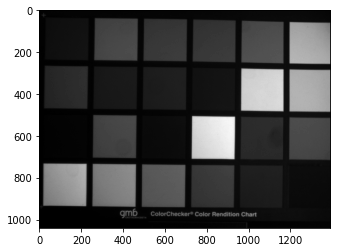

In [13]:
plt.imshow(spectral_cube[:,10,:], cmap="gray")
#plt.imshow(single_slice, cmap="gray")
print(single_slice.dtype)
plt.show()

Correction 1: pixel-wise

In [27]:
spectral_cube.shape
lines = 1040
bands = 51
samples = 1392

In [67]:
path = "/content/drive/MyDrive/ASI/Temp/nuance.raw"
fopen = open(path, "rb")
raw_image = numpy.fromfile(fopen, dtype=numpy.uint16) #uint16 float32 #count=spatial_pixels*sample_lines*spectral_bands
spectral_image = numpy.reshape(raw_image, (1040, 51, 1392))


In [20]:
path = "/content/drive/MyDrive/ASI/Temp/white.raw"
fopen = open(path, "rb")
raw_image = numpy.fromfile(fopen, dtype=numpy.uint16) #uint16 float32 #count=spatial_pixels*sample_lines*spectral_bands
white_image = numpy.reshape(raw_image, (1040, 51, 1392))



In [23]:
corrected_image = numpy.divide(spectral_image, white_image)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


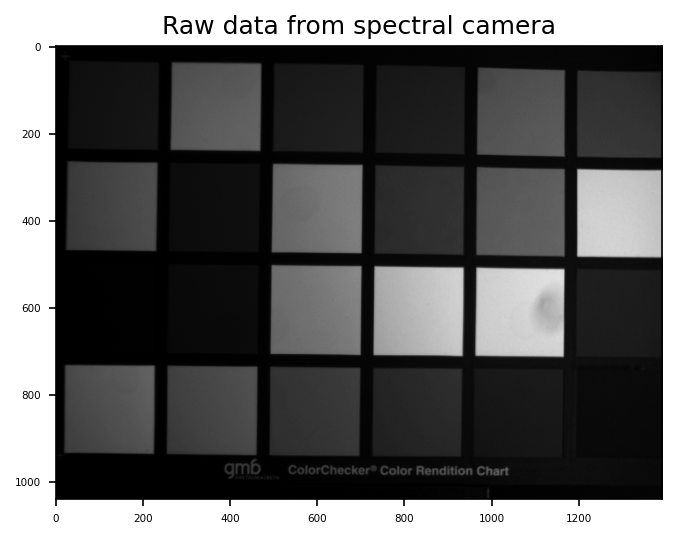

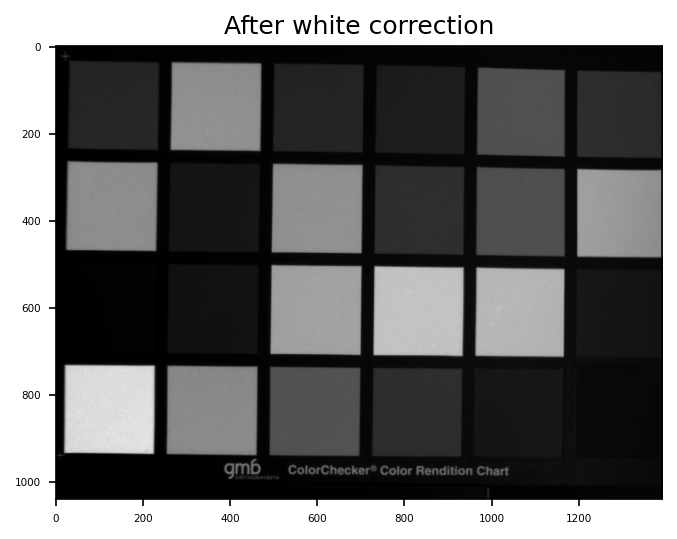

In [26]:
plt.rcParams['figure.dpi'] = 150
plt.imshow(spectral_image[:,20,:], cmap="gray")#
plt.title("Raw data from spectral camera")
plt.tick_params(axis='both', which='major', labelsize=5)
plt.show()
plt.imshow(corrected_image[:,20,:], cmap="gray", vmin=0, vmax= 1)#
plt.title("After white correction")
plt.tick_params(axis='both', which='major', labelsize=5)
plt.show()


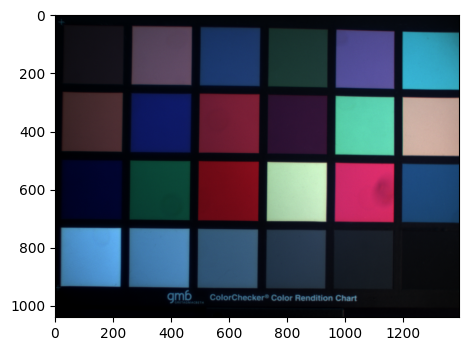

In [32]:
RGB = numpy.empty((lines, samples, 3), dtype=numpy.float32)
RGB[:,:,0] = spectral_image[:,20,:]/numpy.amax(spectral_image[:,20,:])
RGB[:,:,1] = spectral_image[:,10,:]/numpy.amax(spectral_image[:,10,:])
RGB[:,:,2] = spectral_image[:,0,:]/numpy.amax(spectral_image[:,0,:])

plt.rcParams['figure.dpi'] = 100
plt.imshow(RGB)

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


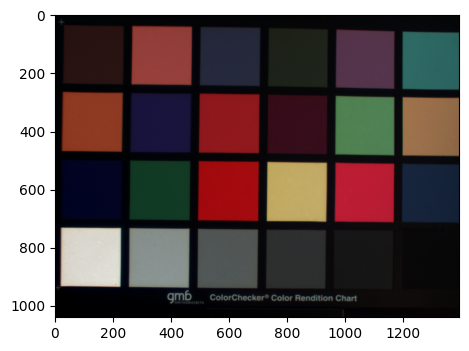

In [69]:
RGB = numpy.empty((lines, samples, 3), dtype=numpy.float32)
#RGB[:,:,0] = spectral_image[:,ch_1,:]/numpy.amax(spectral_image[:,ch_1,:])
#RGB[:,:,1] = spectral_image[:,ch_2,:]/numpy.amax(spectral_image[:,ch_2,:])
#RGB[:,:,2] = spectral_image[:,ch_3,:]/numpy.amax(spectral_image[:,ch_3,:])
RGB[:,:,0] = corrected_image[:,21,:]
RGB[:,:,1] = corrected_image[:,11,:]
RGB[:,:,2] = corrected_image[:,0,:]

plt.rcParams['figure.dpi'] = 100
plt.imshow(RGB)

plt.show()

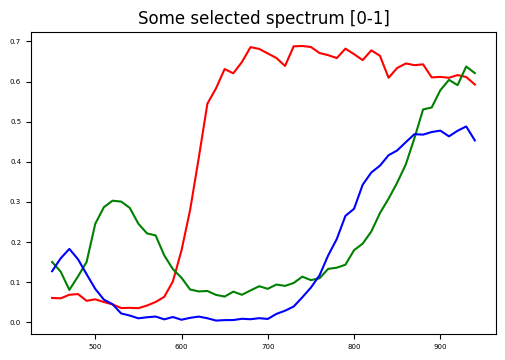

In [54]:
waves = numpy.arange(450,955,10)
b = 50
plt.plot(waves[:b], corrected_image[600,:,600][:b], "r")
plt.plot(waves[:b], corrected_image[600,:,400][:b], 'g')#
plt.plot(waves[:b], corrected_image[600,:,100][:b], 'b')#
plt.title("Some selected spectrum [0-1]")
plt.tick_params(axis='both', which='major', labelsize=5)
plt.show()

Correction 2: element-wise

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


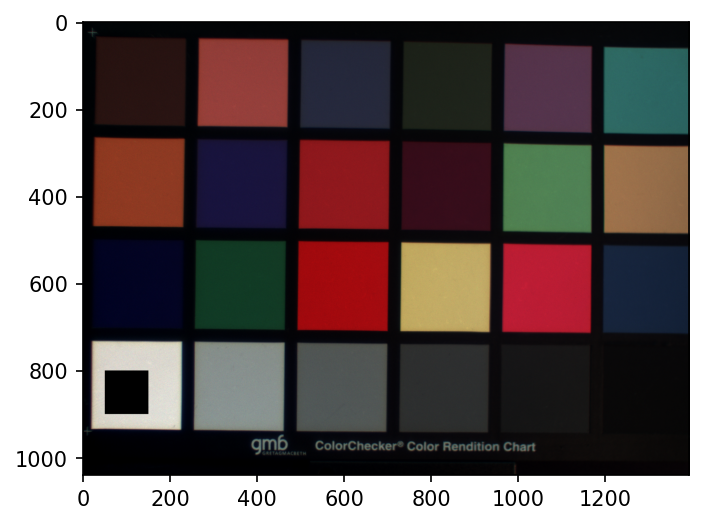

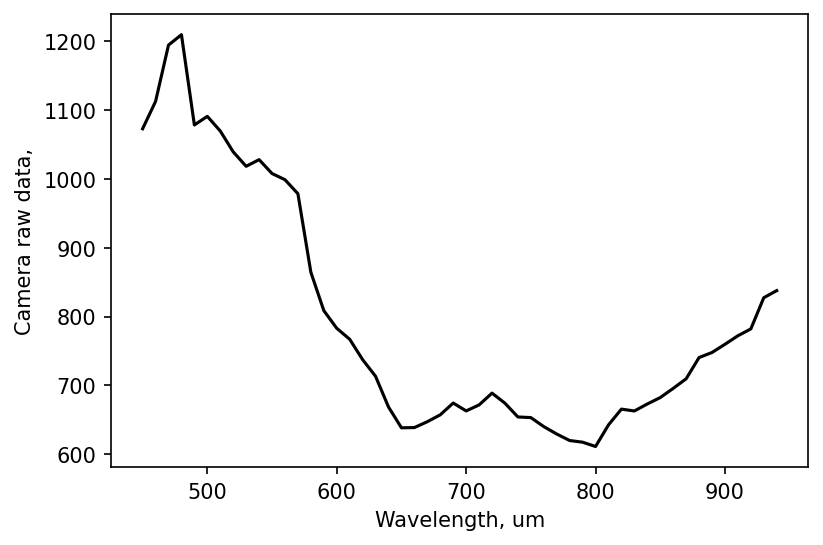

In [74]:
RGB2 = RGB.copy()
# Select White
x1 = 50
x2 = 150
y1 = 800
y2 = 900
RGB2[y1:y2,x1:x2,0] = 0
RGB2[y1:y2,x1:x2,1] = 0
RGB2[y1:y2,x1:x2,2] = 0
sel = spectral_image[y1:y2,:,x1:x2]
sel1 = numpy.sum(sel, axis = 0)
white = numpy.sum(sel1, axis =1)/((x2-x1)*(y2-y1))
########################################################
plt.rcParams['figure.dpi'] = 150
plt.imshow(RGB2)
plt.show()

plt.plot(waves[:b], white[:b], "black")


plt.xlabel('Wavelength, um')
plt.ylabel('Camera raw data,')
#plt.ylabel('Reflectance [0-100]%')
plt.show()

In [75]:
spectral_cube = numpy.empty((lines,bands,samples), dtype = numpy.float32)
for i in range(0,lines):
  for j in range(0,samples):
    spectral_cube[i,:,j] = spectral_image[i,:,j]/white #numpy.divide(spectral_image[i,:,j], white)


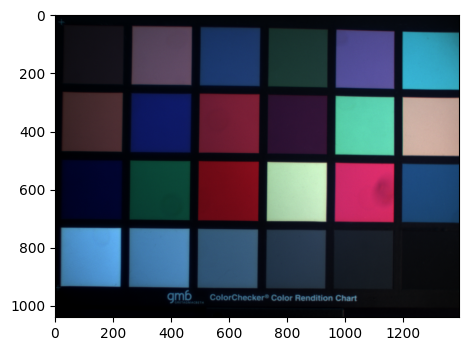

In [80]:
RGB = numpy.empty((lines, samples, 3), dtype=numpy.float32)
RGB[:,:,0] = spectral_image[:,20,:]/numpy.amax(spectral_image[:,20,:])
RGB[:,:,1] = spectral_image[:,10,:]/numpy.amax(spectral_image[:,10,:])
RGB[:,:,2] = spectral_image[:,0,:]/numpy.amax(spectral_image[:,0,:])
plt.rcParams['figure.dpi'] = 100
plt.imshow(RGB)

plt.show()